# Reference
 - __[MachineLearningMastery](https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/)__

# Prophet Forecasting Library

In [4]:
# !pip install prophet

In [5]:
# Importing library
import prophet
from prophet import Prophet
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import numpy as np

# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans, AffinityPropagation
# import seaborn as sns
# %matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")
# import plotly as py
# import plotly.graph_objs as go
# import os
# py.offline.init_notebook_mode(connected = True)
# import datetime as dt
# import missingno as msno
# plt.rcParams['figure.dpi'] = 140
# import scipy as sp

In [6]:
# check prophet version
print('Prophet %s' % prophet.__version__)

Prophet 1.1.7


# Car Sales Dataset

## Load, Summarize, Plot Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


None

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


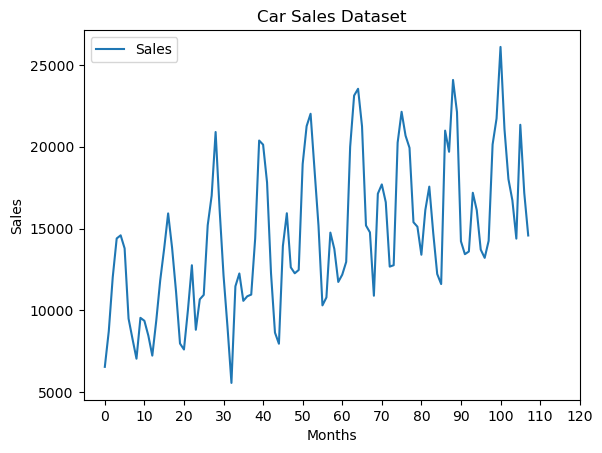

In [9]:
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df   = pd.read_csv(path, header=0)

# summarize dataset
display(df.info())
display(df.describe())
display(df.head())

# plot the time series
df.plot()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Car Sales Dataset')
plt.xticks(np.arange(0, 130, step=10))
plt.show()

# Forecast Car Sales With Prophet

## Make an In-Sample Forecast

13:43:19 - cmdstanpy - INFO - Chain [1] start processing
13:43:19 - cmdstanpy - INFO - Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14365.838146  12775.549843  15996.542789
1 1968-02-01  14940.305749  13452.162710  16502.448949
2 1968-03-01  20882.028850  19415.192846  22328.024850
3 1968-04-01  22900.416536  21302.275898  24572.977637
4 1968-05-01  24201.080202  22561.117644  25748.832612


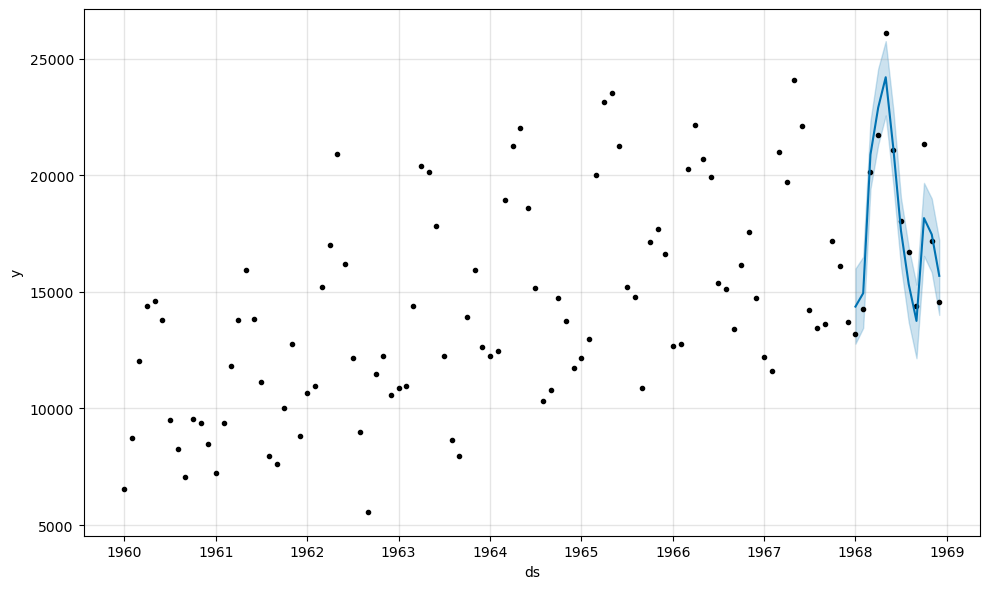

In [12]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

# define the model
model = Prophet()

# fit the model
model.fit(df)

# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
plt.show()

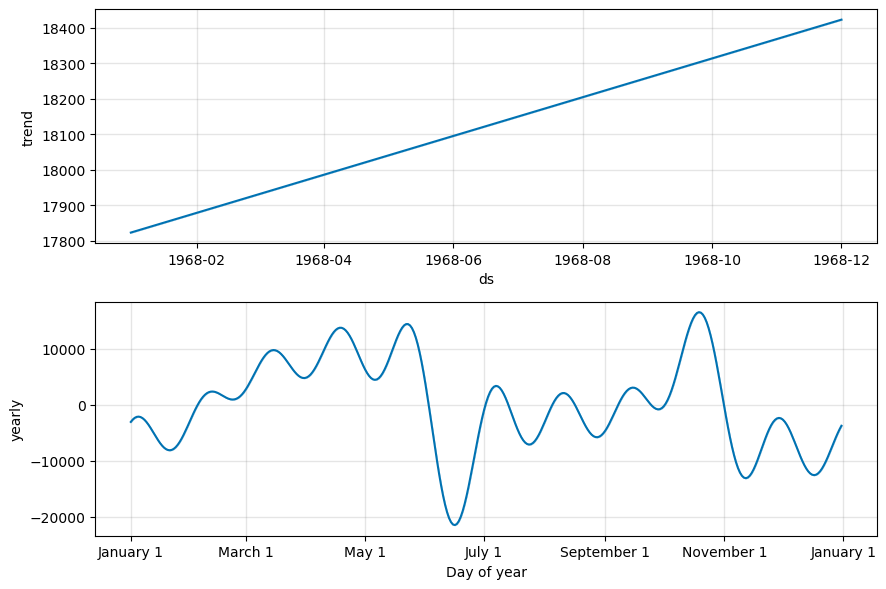

In [13]:
model.plot_components(forecast);

Note
- Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts.
- ds         : the datestamp of the forecasted value
- yhat       : the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
- yhat_lower : the lower bound of our forecasts
- yhat_upper : the upper bound of our forecasts

## Make an Out-of-Sample Forecast

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15414.370948  14034.366819  17018.347629
1 1969-02-01  16182.031762  14571.300989  17817.484241
2 1969-03-01  21399.275915  19807.859707  23000.674474
3 1969-04-01  23514.723288  22004.277166  25042.154698
4 1969-05-01  25020.049095  23297.641437  26628.920830


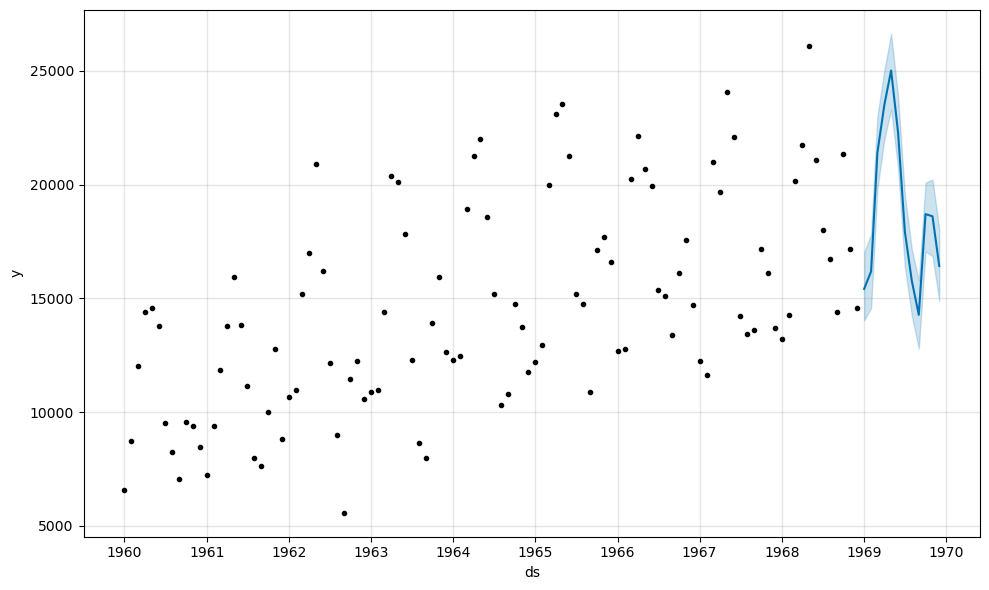

In [16]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
plt.show()

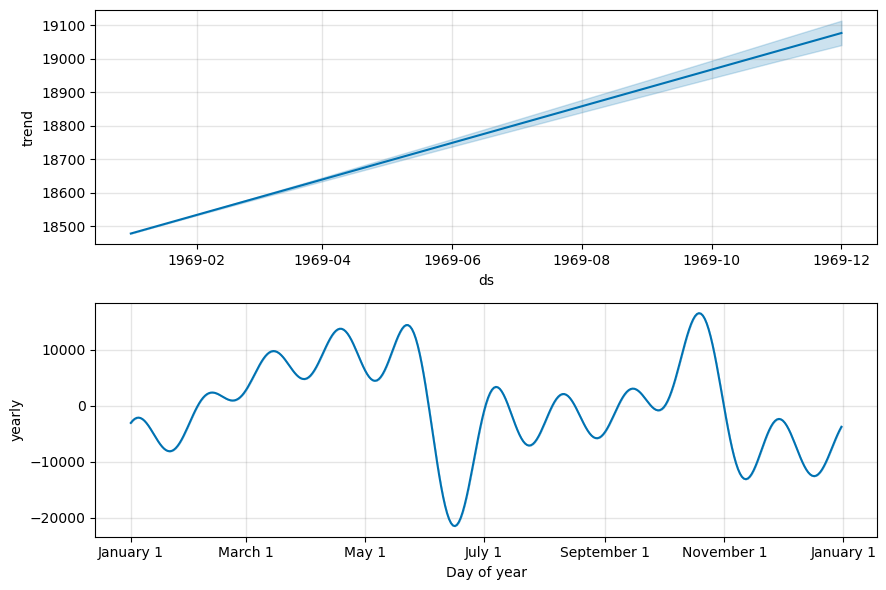

In [17]:
model.plot_components(forecast);

## Manually Evaluate Forecast Model

13:43:22 - cmdstanpy - INFO - Chain [1] start processing


           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


13:43:23 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1336.813


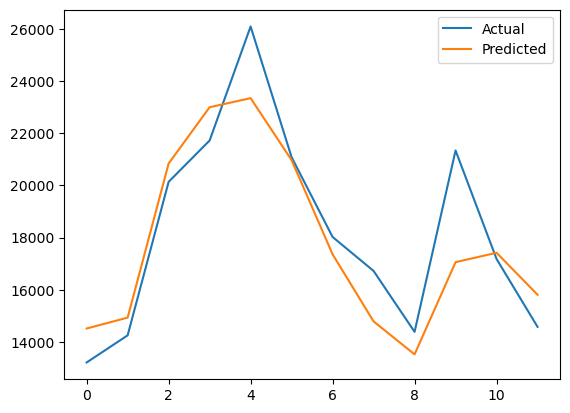

In [19]:
from sklearn.metrics import mean_absolute_error

# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

# define the model
model = Prophet()

# fit the model
model.fit(train)

# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()